In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

In [40]:
df = pd.read_csv('clean_dataset.csv',parse_dates=['day'])
df['time'] = df['hour'].apply(lambda h:pd.Timedelta(f'{h+2}h'))+df['day']
df = df.set_index('time')
df.head()

,day,hour,idplant,0_sin_day,0_cos_day,0_sin_hour,0_cos_hour,plant-irradiance,plant-power,plant-temperature,weather-cloudcover,weather-dewpoint,weather-humidity,weather-pressure,weather-temperature,weather-windbearing,weather-windspeed
time,,,,,,,,,,,,,,,,,
2012-01-01 02:00:00,2012-01-01,0,1,0.017166,0.999853,0.500000,0.866025,0.0,0.0,3.0,0.31,1.05,0.76,NaN,14.0,292.0,4.38
2012-01-01 02:00:00,2012-01-01,0,2,0.017166,0.999853,0.500000,0.866025,0.0,152.0,4.5,0.13,2.16,0.65,1021.44,10.0,308.0,3.85
2012-01-01 02:00:00,2012-01-01,0,3,0.017166,0.999853,0.500000,0.866025,174.0,109.0,6.0,0.16,2.14,0.52,1021.35,12.0,342.0,3.40
2012-01-01 03:00:00,2012-01-01,1,1,0.017166,0.999853,0.707107,0.707107,0.0,0.0,3.0,0.24,1.09,0.75,1018.50,14.0,306.0,4.26
2012-01-01 03:00:00,2012-01-01,1,2,0.017166,0.999853,0.707107,0.707107,0.0,307.0,2.5,0.31,2.67,0.55,1021.44,10.0,310.0,4.43


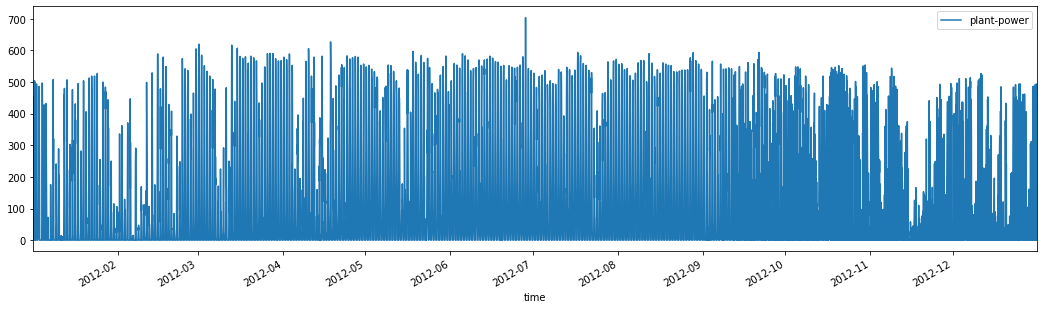

In [41]:
df = pd.DataFrame(df[df['idplant']==1]['plant-power'])
df.plot(figsize=(18,5))

In [42]:
df

,plant-power
time,
2012-01-01 02:00:00,0.0
2012-01-01 03:00:00,0.0
2012-01-01 04:00:00,0.0
2012-01-01 05:00:00,449.0
2012-01-01 06:00:00,152.0
...,...
2012-12-31 16:00:00,0.0
2012-12-31 17:00:00,8.0
2012-12-31 18:00:00,0.0


In [43]:
len(df)

6954

In [44]:
test_size = len(df['2012-01-01':'2012-01-31'])

In [45]:
test_ind = len(df)- test_size

In [46]:
train = df.iloc[:test_ind]
test = df.iloc[test_ind:]

In [47]:
train

,plant-power
time,
2012-01-01 02:00:00,0.0
2012-01-01 03:00:00,0.0
2012-01-01 04:00:00,0.0
2012-01-01 05:00:00,449.0
2012-01-01 06:00:00,152.0
...,...
2012-11-30 16:00:00,0.0
2012-11-30 17:00:00,0.0
2012-11-30 18:00:00,0.0


## Scale Data

In [49]:
from sklearn.preprocessing import MinMaxScaler

In [50]:
scaler = MinMaxScaler()

In [51]:
# IGNORE WARNING ITS JUST CONVERTING TO FLOATS
# WE ONLY FIT TO TRAININ DATA, OTHERWISE WE ARE CHEATING ASSUMING INFO ABOUT TEST SET
scaler.fit(train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [52]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

# Time Series Generator
This class takes in a sequence of data-points gathered at
equal intervals, along with time series parameters such as
stride, length of history, etc., to produce batches for
training/validation.

#### Arguments
    data: Indexable generator (such as list or Numpy array)
        containing consecutive data points (timesteps).
        The data should be at 2D, and axis 0 is expected
        to be the time dimension.
    targets: Targets corresponding to timesteps in `data`.
        It should have same length as `data`.
    length: Length of the output sequences (in number of timesteps).
    sampling_rate: Period between successive individual timesteps
        within sequences. For rate `r`, timesteps
        `data[i]`, `data[i-r]`, ... `data[i - length]`
        are used for create a sample sequence.
    stride: Period between successive output sequences.
        For stride `s`, consecutive output samples would
        be centered around `data[i]`, `data[i+s]`, `data[i+2*s]`, etc.
    start_index: Data points earlier than `start_index` will not be used
        in the output sequences. This is useful to reserve part of the
        data for test or validation.
    end_index: Data points later than `end_index` will not be used
        in the output sequences. This is useful to reserve part of the
        data for test or validation.
    shuffle: Whether to shuffle output samples,
        or instead draw them in chronological order.
    reverse: Boolean: if `true`, timesteps in each output sample will be
        in reverse chronological order.
    batch_size: Number of timeseries samples in each batch
        (except maybe the last one).

In [54]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [55]:
# Let's redefine to get 20 hrs back and then predict the next hour
length = 20
generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=1)

In [56]:
# What does the first batch look like?
X,y = generator[0]

In [57]:
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.         0.         0.         0.63778409 0.21590909 0.43607955
 0.1875     0.         0.46164773 0.01278409 0.64772727 0.
 0.01136364 0.71590909 0.         0.         0.         0.70596591
 0.         0.        ]
Predict this y: 
 [[0.]]


### Create the Model

In [58]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [59]:
# We're only using one feature in our time series
n_features = 1

In [60]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(length, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [61]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100)               40800     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


### EarlyStopping and creating a Validation Generator

NOTE: The scaled_test dataset size MUST be greater than your length chosen for your batches. Review video for more info on this.

In [63]:
from tensorflow.keras.callbacks import EarlyStopping

In [64]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [65]:
validation_generator = TimeseriesGenerator(scaled_test,scaled_test, length=length, batch_size=1)

In [66]:
# fit model
model.fit_generator(generator,epochs=20,
                    validation_data=validation_generator,
                   callbacks=[early_stop])

Epoch 1/20
  41/6345 [..............................] - ETA: 54:34 - loss: 0.0769

KeyboardInterrupt: 

In [ ]:
losses = pd.DataFrame(model.history.history)

In [ ]:
losses.plot()

## Evaluate on Test Data

In [ ]:
first_eval_batch = scaled_train[-length:]

In [ ]:
first_eval_batch = first_eval_batch.reshape((1, n_input, n_features))

In [ ]:
model.predict(first_eval_batch)

In [ ]:
scaled_test[0]

In [ ]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

## Inverse Transformations and Compare

In [ ]:
true_predictions = scaler.inverse_transform(test_predictions)

In [ ]:
# IGNORE WARNINGS
test['Predictions'] = true_predictions

In [ ]:
test

In [ ]:
test.plot(figsize=(12,8))